In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
import matplotlib.cm as cm
# Setting seed for reproducibiltiy
SEED = 42
tf.random.set_seed(SEED)

In [2]:
# Defining data directories and parameters
train_data_dir = r"C:\Training\Training"
validation_data_dir = r"C:\Validation\Validation"
batch_size = 32
image_size = (128,128)
num_epochs = 50
num_classes = 4

In [3]:
# Create data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [4]:
validation_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 5040 images belonging to 4 classes.


In [5]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1440 images belonging to 4 classes.


In [6]:
# Create the VGG16 model with a custom output layer
base_model = VGG16(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='gelu')(x)
x = Dropout(0.1)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(lr=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the trained model
model.save('vgg16_model.h5')


C:\Users\sohan\.conda\envs\tf_gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/50
157/157 [==============================] - 69s 407ms/step - loss: 0.9780 - accuracy: 0.5635 - val_loss: 1.7774 - val_accuracy: 0.3986
Epoch 2/50
157/157 [==============================] - 59s 375ms/step - loss: 0.6935 - accuracy: 0.6987 - val_loss: 2.2078 - val_accuracy: 0.4250
Epoch 3/50
157/157 [==============================] - 58s 370ms/step - loss: 0.5875 - accuracy: 0.7508 - val_loss: 1.9279 - val_accuracy: 0.4521
Epoch 4/50
157/157 [==============================] - 58s 370ms/step - loss: 0.5502 - accuracy: 0.7652 - val_loss: 2.1075 - val_accuracy: 0.4743
Epoch 5/50
157/157 [==============================] - 58s 371ms/step - loss: 0.5333 - accuracy: 0.7770 - val_loss: 1.9809 - val_accuracy: 0.4660
Epoch 6/50
157/157 [==============================] - 59s 373ms/step - loss: 0.4954 - accuracy: 0.7925 - val_loss: 1.8671 - val_accuracy: 0.4924
Epoch 7/50
157/157 [==============================] - 58s 369ms/step - loss: 0.4601 - accuracy: 0.8121 - val_loss: 2.0468 - val_ac

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Validation Loss: {loss:.4f}')
print(f'Validation Accuracy: {accuracy:.4f}')

45/45 [==============================] - 13s 278ms/step - loss: 4.3983 - accuracy: 0.5125
Validation Loss: 4.3983
Validation Accuracy: 0.5125


In [8]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

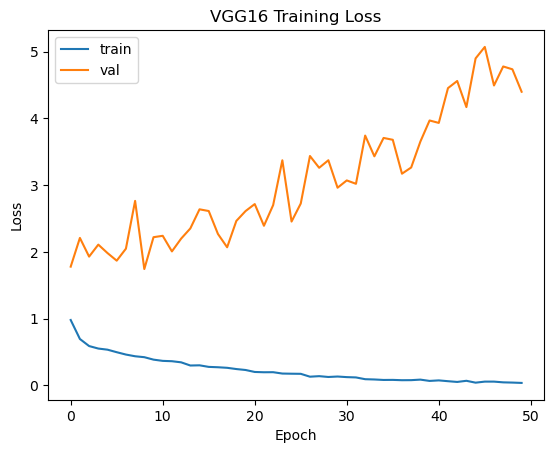

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG16 Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

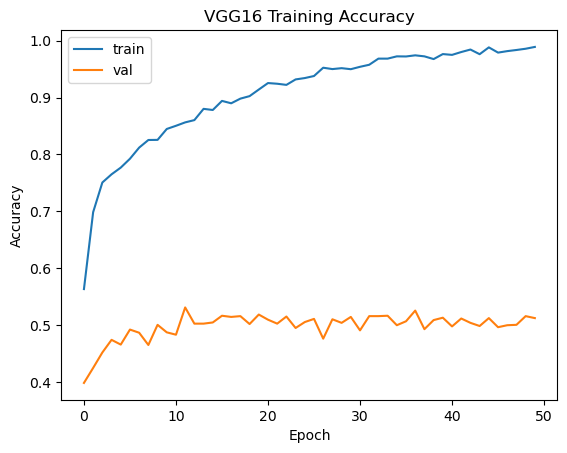

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG16 Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()